In [4]:
from keras.datasets.mnist import load_data
# load_data()
# data為 tuple(已分好train,test)
# 給名字(x=內容, y= 答案)
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
print("訓練資料的維度", x_train.shape)

print("測試資料的維度", x_test.shape)

訓練資料的維度 (60000, 28, 28)
測試資料的維度 (10000, 28, 28)


ANS: 4


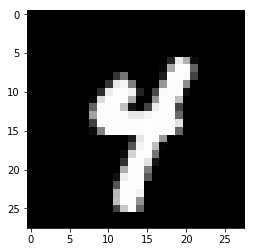

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
import random
c = random.randint(0 , 59999)
# 28行(60000比的答案)
print("ANS:", y_train[c])

# x 為每張圖片的維度，所以上方用c 來找出相對應的X 的維度圖片並印出
plt.imshow(x_train[c], cmap="gray")

In [9]:
import pandas as pd
pd.DataFrame(x_train[c])
# 0 為黑 中間為灰 255為白

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,38,236,175,11,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,171,252,253,98,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,252,252,250,66,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,252,252,140,0,0,0,0,0,0,0


In [23]:
# 建模前資料要整理一下(圖闢進去就一定要常態化)因為常態化比較好調整
# 中心左右對稱的常態化為佳
# x進去進去前一定要常態化(好配合keras一開始隨進的那組weights) (/255)
# 進到mlp前 不能為二維，一定要攤開(reshape)
# 28*28 = 784
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

# 答案會形成機率
# y 進去的時候要為 one-hot encoding 3 -> [0,0,0,1,0,0,0,0,0,0]
# utils = 好用的工具
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# show
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
# Sequential = 建立簡單的線性執行的模型(一層一層疊上去，蛋糕支架) , Dense = 多少層 

from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()

# 第一個中間層要告訴他多少個輸入(input_dim)=隱藏層，多少神經元由經驗挑選(數字要是2的次方)=128
mlp.add(Dense(128, input_dim=784, activation="relu"))
mlp.add(Dense(10, activation="softmax"))

# 印出模型
mlp.summary()

# 模型報表
# W有需要調整，parameter=10*128,輸出才激活所以有10個激活函數
# 把偏移放入，為了讓每個激活函數都有一樣開頭，從 0 開始 (多一個學習函數(bias)=129)
# 利用bias讓先放入所以parameter = 129*10 = 12900
# 激活數 = 784 * 128 +128(bias) = 100480

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 訓練前:確定模型訓練方式
# 梯度下降的優化器(optimizer)---小彈珠優化法，
# 因為梯度下降時可能會遇到局部最低點部有達到全局最低點:
# 所以用"動量"來累積動能轉位能(優化)----ADAM(初階):既累積動能也能調學習速率

# loss 的選擇 : 回歸:mse, 二元分類(output:1):binary_crossentropy , 
# 多元分類(output > 1 ):catagorical_crossentropy
# metrics 看模型準不準
# 要留資料作驗證
mlp.compile(optimizer="adam",
            loss ="categorical_crossentropy", 
            metrics = ["accuracy"] )


In [21]:
# shape: 資料攤開 , cat:機率 , 
# 不要讓梯度下降(不要每次做):既可平均也可省時(batch:批次)=依據圖片多少來選100-200
# batch:看幾張圖做一次下降
# epochs: 整個資料集看幾次
# epochs: 10 , batch=200, 54000*10 / 200 = 3000(梯度下降)---6000為驗證資料
# fit(verbos) 印log的詳細程度


mlp.fit(x_train_shape, y_train_cat, 
        batch_size= 200, 
        epochs=15,
        validation_split=0.1,  
        verbose=2 )

# 看val_loss 跟正確答案的距離，報表只看這個
# 可以看出epochs最好多少(起點為10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4284 - acc: 0.8854 - val_loss: 0.1895 - val_acc: 0.9483
Epoch 2/15
 - 1s - loss: 0.1915 - acc: 0.9458 - val_loss: 0.1354 - val_acc: 0.9630
Epoch 3/15
 - 1s - loss: 0.1413 - acc: 0.9601 - val_loss: 0.1140 - val_acc: 0.9705
Epoch 4/15
 - 1s - loss: 0.1111 - acc: 0.9692 - val_loss: 0.0986 - val_acc: 0.9722
Epoch 5/15
 - 1s - loss: 0.0914 - acc: 0.9736 - val_loss: 0.0923 - val_acc: 0.9748
Epoch 6/15
 - 1s - loss: 0.0764 - acc: 0.9786 - val_loss: 0.0858 - val_acc: 0.9750
Epoch 7/15
 - 1s - loss: 0.0656 - acc: 0.9814 - val_loss: 0.0847 - val_acc: 0.9760
Epoch 8/15
 - 1s - loss: 0.0570 - acc: 0.9841 - val_loss: 0.0839 - val_acc: 0.9757
Epoch 9/15
 - 1s - loss: 0.0494 - acc: 0.9862 - val_loss: 0.0770 - val_acc: 0.9773
Epoch 10/15
 - 1s - loss: 0.0431 - acc: 0.9883 - val_loss: 0.0791 - val_acc: 0.9772
Epoch 11/15
 - 1s - loss: 0.0374 - acc: 0.9898 - val_loss: 0.0775 - val_acc: 0.9768
Epoch 12/15
 - 1s - loss: 0.0333 - a

In [24]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.06831497500406113, 0.9789]

In [25]:
# 不看機率只看預測結果(1)
# confusion_matrix --- > 混淆矩陣是機器學習中總結分類模型預測結果的情形分析表
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_shape)))
# confusion_matrix(y_test, mlp.predict_classes(x_test_shape))

,0,1,2,3,4,5,6,7,8,9
0,966,1,2,1,2,1,2,1,1,3
1,0,1127,4,0,0,1,0,1,2,0
2,3,2,1002,5,2,0,2,8,7,1
3,0,0,2,997,0,2,0,3,4,2
4,0,1,4,0,957,0,5,2,1,12
5,2,0,0,10,1,867,5,1,5,1
6,3,3,3,1,4,3,939,1,1,0
7,0,4,8,3,0,0,0,1008,0,5
8,1,1,4,6,3,2,2,4,948,3
9,0,5,0,10,8,3,0,5,0,978


你想要判斷的圖片名稱:02.png
[2]


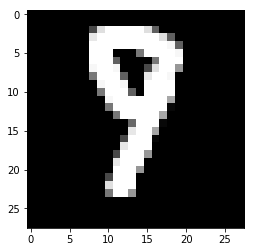

In [28]:
# 自己做一張圖片來讓模型做判斷
# convert("L") --改成灰階
# 進入kera,mlp 一定要是nparray
from PIL import Image
import numpy as np
fn = input("你想要判斷的圖片名稱:")

img1 = np.array(Image.open(fn).resize((28, 28)).convert("L"))
x_pre = np.array([img1]).reshape(1, 784) / 255
print(mlp.predict_classes(x_pre))
plt.imshow(img1, cmap="gray")